In [1]:
from pymongo import MongoClient
import pandas as pd

In [56]:
cluster ="mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false"
client=MongoClient(cluster)

db = client.crypto

In [57]:
x=db.project.find().sort("updated_at")

In [58]:
# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(x))

#df.drop('_id')

allassets= df.drop('_id',1)

In [59]:
allassets.head()

,market,asset,price,change_24h,updated_at
0,KRAKEN,LTC,167.775000,-6.931270,2021-10-12T12:51:53.093058
1,COINBASE,LTC,167.925000,-6.796359,2021-10-12T12:51:53.172599
2,COINBASE,XLM,0.321249,-9.289363,2021-10-12T12:51:53.319533
3,COINBASE,BTC,56855.695000,0.648538,2021-10-12T12:51:53.515125
4,BITTREX,BTC,56853.410000,0.624828,2021-10-12T12:51:55.806389


In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [61]:
allassets.asset = allassets.asset.astype('category')
allassets.market = allassets.market.astype('category')

In [62]:
allassets.market

0          KRAKEN
1        COINBASE
2        COINBASE
3        COINBASE
4         BITTREX
           ...   
13701     BITTREX
13702     BITTREX
13703      KRAKEN
13704     BITTREX
13705      KRAKEN
Name: market, Length: 13706, dtype: category
Categories (4, object): ['BITFINEX', 'BITTREX', 'COINBASE', 'KRAKEN']

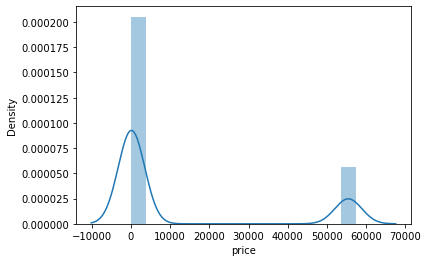

In [63]:
vis1 = sns.distplot(allassets['price'],bins=15)

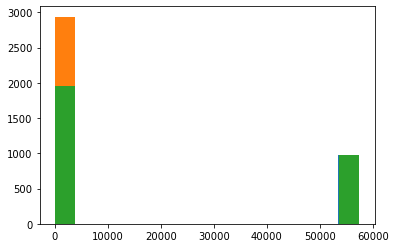

In [64]:
plt.hist(allassets[allassets.market == 'BITFINEX'].price ,bins=15)
plt.hist(allassets[allassets.market == 'BITTREX'].price ,bins=15)
plt.hist(allassets[allassets.market == 'COINBASE'].price ,bins=15)
plt.hist(allassets[allassets.market == 'KRAKEN'].price ,bins=15)
plt.show()

In [89]:
df_ltc=allassets[(allassets.asset=='LTC')&(allassets.market=='KRAKEN')]

df_ltc.set_index('updated_at', drop=True, inplace=True)
df_ltc.sort_index(inplace=True)
df_ltc=df_ltc.loc[~df_ltc.index.duplicated(), :]
df_ltc.head()

,market,asset,price,change_24h
updated_at,,,,
2021-10-12T12:51:53.093058,KRAKEN,LTC,167.775,-6.931270
2021-10-12T12:55:53.089139,KRAKEN,LTC,167.535,-7.151962
2021-10-12T13:04:53.195684,KRAKEN,LTC,169.915,-5.744162
2021-10-12T13:08:53.109778,KRAKEN,LTC,170.365,-5.499778
2021-10-12T13:11:53.091589,KRAKEN,LTC,170.455,-5.549399


Text(0.5, 1.0, 'One Day Litecoin Price Analyses')

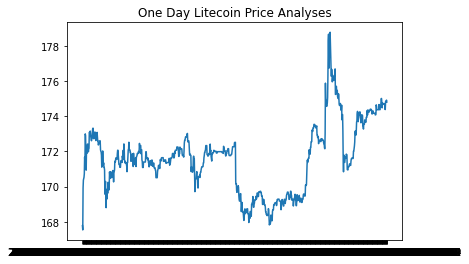

In [66]:
plt.plot(df_ltc.price)
plt.title('One Day Litecoin Price Analyses')

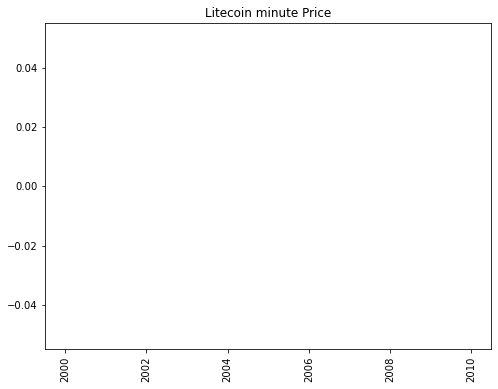

In [91]:
plt.figure(figsize=(8,6))
plt.plot(df_ltc.asfreq('30S').price, marker='.')
plt.title('Litecoin minute Price')
plt.xticks(rotation=90)
plt.show()

In [115]:
x2=db.project.find({"updated_at":{'$gte': "2021-10-12 01:00:48", '$lt': "2021-10-13 22:34:48"}})
df2 =  pd.DataFrame(list(x2))
df2

,_id,market,asset,price,change_24h,updated_at
0,616585095a0c377706cc2311,COINBASE,BTC,56855.695000,0.648538,2021-10-12T12:51:53.515125
1,616585095a0c377706cc2312,BITFINEX,BTC,56811.500000,0.198416,2021-10-12T12:51:56.638741
2,616585095a0c377706cc2313,BITTREX,BTC,56853.410000,0.624828,2021-10-12T12:51:55.806389
3,616585095a0c377706cc2314,COINBASE,LTC,167.925000,-6.796359,2021-10-12T12:51:53.172599
4,616585095a0c377706cc2315,BITFINEX,LTC,167.800000,-7.138904,2021-10-12T12:51:56.639835
...,...,...,...,...,...,...
6897,61660c875a0c377706cc3fee,BITTREX,IOTA,1.390000,-6.711409,2021-10-12T22:30:00.916812
6898,61660c875a0c377706cc3fef,COINBASE,XLM,0.333692,-2.300974,2021-10-12T22:29:57.086817
6899,61660c875a0c377706cc3ff0,BITFINEX,XLM,0.333825,-2.487293,2021-10-12T22:30:00.730852
6900,61660c875a0c377706cc3ff1,KRAKEN,XLM,0.333844,-1.978813,2021-10-12T22:30:01.353698


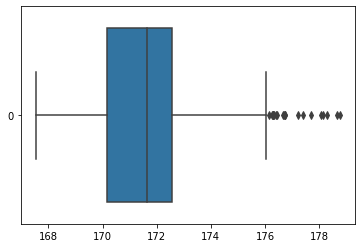

In [162]:
ax = sns.boxplot(data=df_ltc['price'], orient="h")

In [165]:
df_ltc.describe()

,price,change_24h
count,978.000000,978.000000
mean,171.601058,-2.229501
std,1.921574,2.979124
min,167.535000,-7.699038
25%,170.173750,-4.705137
50%,171.635000,-2.924566
75%,172.550000,0.218054
max,178.775000,6.301795


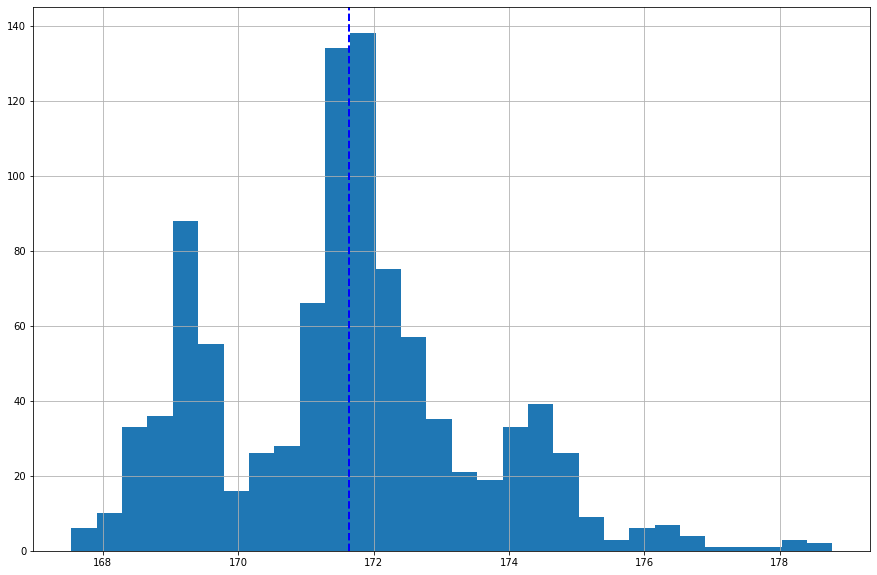

In [164]:
df_ltc['price'].hist(bins=30, figsize=(15,10)).axvline(df_ltc['price'].median(), color='b', linestyle='dashed', linewidth=2)

In [166]:
df_ltc.min()

price         167.535000
change_24h     -7.699038
dtype: float64

<AxesSubplot:xlabel='updated_at'>

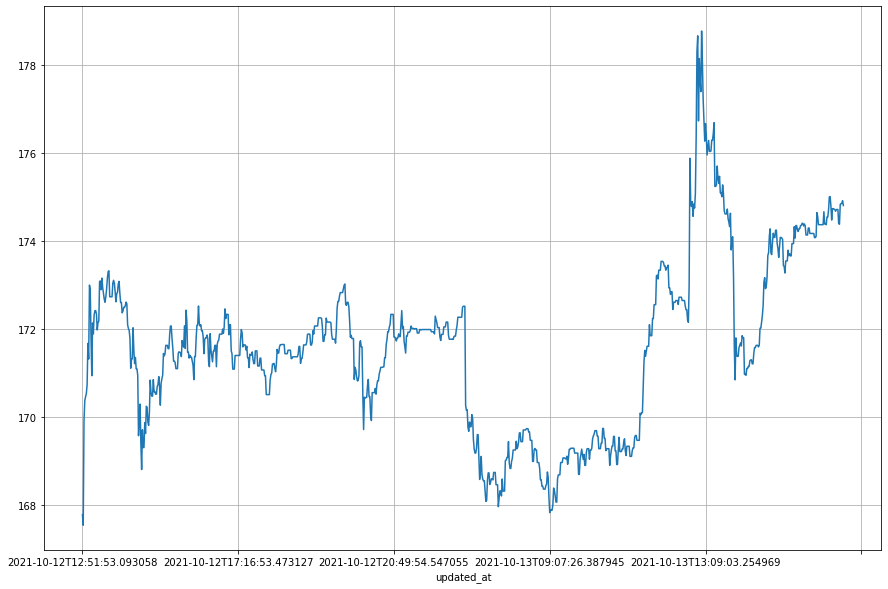

In [171]:
df_ltc['price'].plot(grid=True, figsize=(15, 10))

In [174]:
df_btc=allassets[(allassets.asset=='BTC')&(allassets.market=='COINBASE')]

df_btc.set_index('updated_at', drop=True, inplace=True)
df_btc.sort_index(inplace=True)
df_btc=df_btc.loc[~df_btc.index.duplicated(), :]
df_btc.head()

,market,asset,price,change_24h
updated_at,,,,
2021-10-12T12:51:53.515125,COINBASE,BTC,56855.695,0.648538
2021-10-12T12:55:53.577405,COINBASE,BTC,56806.400,0.561274
2021-10-12T13:04:53.603834,COINBASE,BTC,57082.805,-0.268997
2021-10-12T13:08:53.556829,COINBASE,BTC,57174.545,-0.108715
2021-10-12T13:11:53.549197,COINBASE,BTC,57167.795,-0.120508


In [178]:
df_xmr=allassets[(allassets.asset=='XMR')&(allassets.market=='KRAKEN')]

df_xmr.set_index('updated_at', drop=True, inplace=True)
df_xmr.sort_index(inplace=True)
df_xmr=df_xmr.loc[~df_btc.index.duplicated(), :]
df_xmr.head()

,market,asset,price,change_24h
updated_at,,,,
2021-10-12T12:51:56.525362,KRAKEN,XMR,270.100,-1.952955
2021-10-12T12:55:57.321854,KRAKEN,XMR,270.835,-1.714690
2021-10-12T13:04:56.702728,KRAKEN,XMR,272.755,-0.917248
2021-10-12T13:08:56.752065,KRAKEN,XMR,273.530,-0.444040
2021-10-12T13:11:56.631445,KRAKEN,XMR,273.615,-0.485543


<AxesSubplot:xlabel='updated_at'>

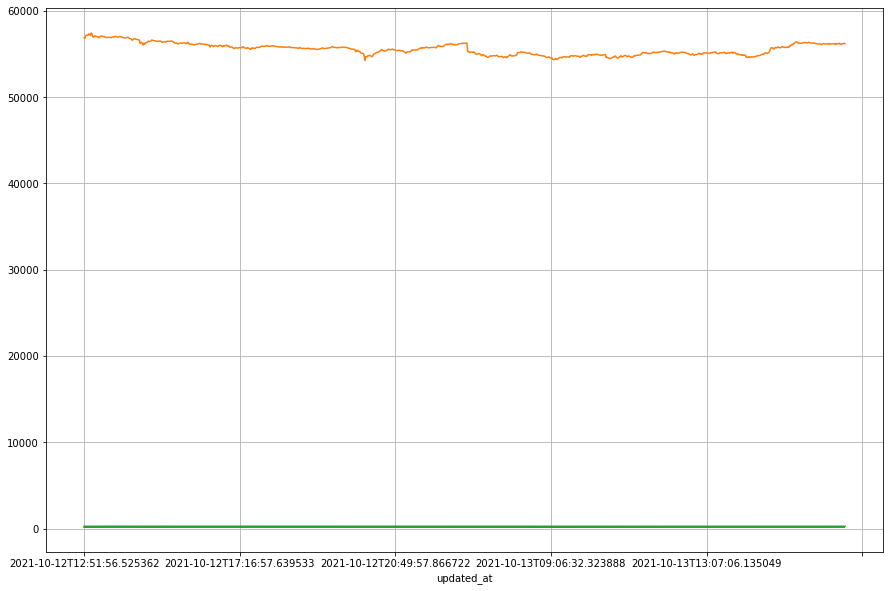

In [179]:
df_ltc['price'].plot(grid=True, figsize=(15, 10))
df_btc['price'].plot(grid=True, figsize=(15, 10))
df_xmr['price'].plot(grid=True, figsize=(15, 10))

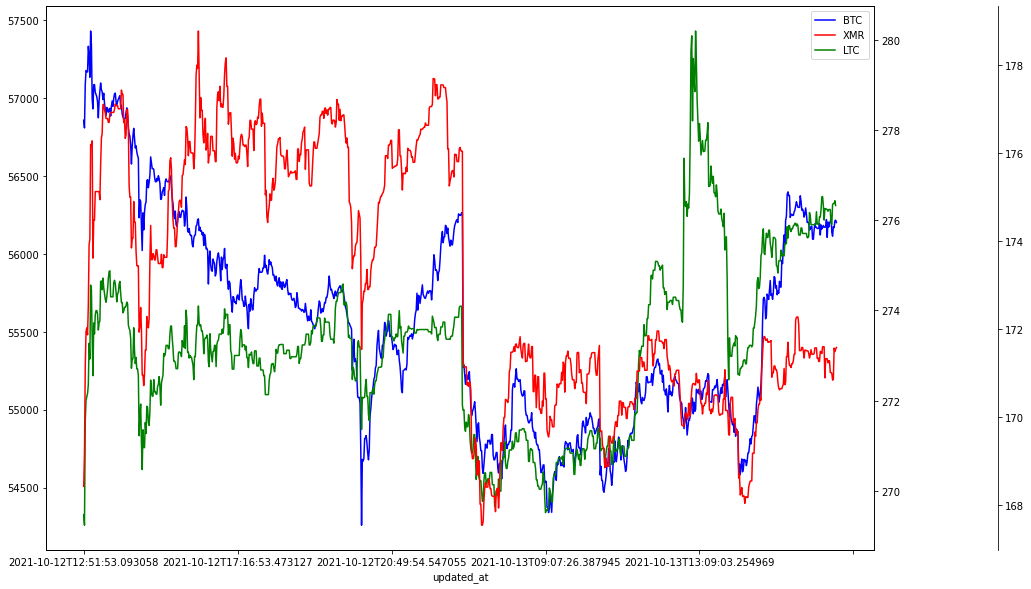

In [180]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df_btc['price'].plot(ax=ax1, style='b-')
df_xmr['price'].plot(ax=ax1, style='r-', secondary_y=True)
df_ltc['price'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'XMR', 'LTC'])